In [3]:
from ultralytics.data import YOLODataset
import numpy as np



In [2]:
from ultralytics import YOLO
from ultralytics.data.dataset import YOLODataset
import ultralytics.data.build as build
import numpy as np
import matplotlib.pyplot as plt
import cv2

verificaçao de balanceio, devido ao nao suporte do yolov8 para soluçoes como classes weighted, q supostamente dariam um peso maior para classe minoritarias, um workaround foi iniciado (alterar code fonte do yolov8 nao esta sendo cogitado, ams poderia resolver)

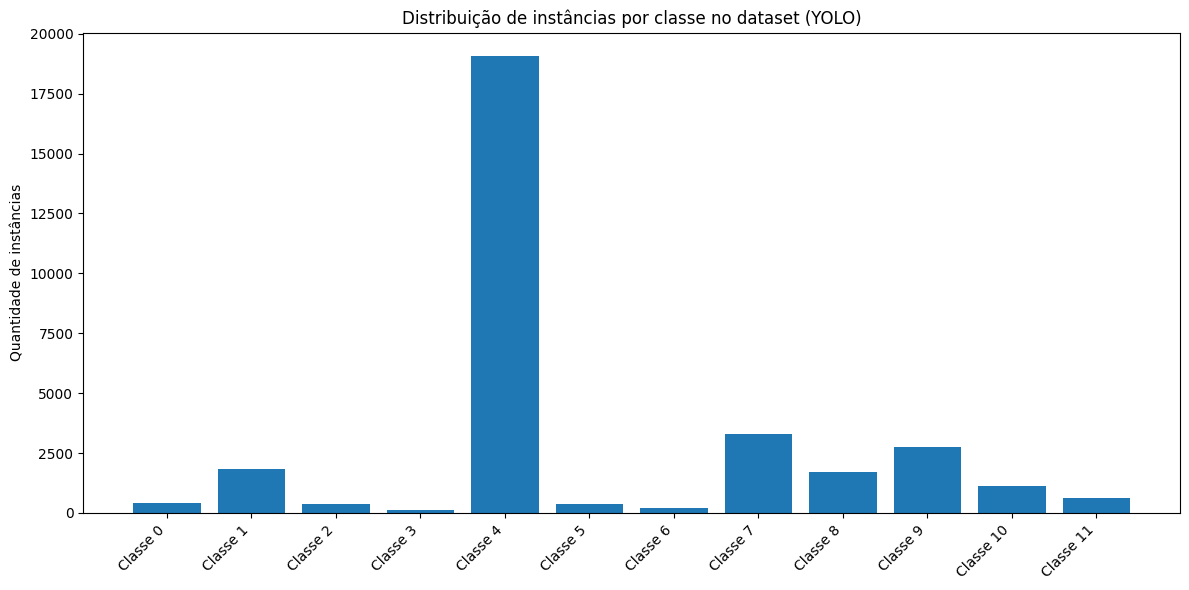

In [5]:
import os
from collections import Counter
import matplotlib.pyplot as plt


labels_dir = 'train/labels'  

counter = Counter()

for filename in os.listdir(labels_dir):
    if filename.endswith('.txt'):
        with open(os.path.join(labels_dir, filename), 'r') as f:
            for line in f:
                class_id = line.strip().split()[0]
                counter[class_id] += 1


class_ids = sorted([int(cid) for cid in counter.keys()])
counts = [counter[str(cid)] for cid in class_ids]


class_names = [f'Classe {cid}' for cid in class_ids]

plt.figure(figsize=(12,6))
plt.bar(class_names, counts)
plt.xticks(rotation=45, ha='right')
plt.title('Distribuição de instâncias por classe no dataset (YOLO)')
plt.ylabel('Quantidade de instâncias')
plt.tight_layout()
plt.show()


In [3]:
import shutil
import os

def copiar(origem, destino):
    os.makedirs(destino, exist_ok=True)
    for file in os.listdir(origem):
        shutil.copy(os.path.join(origem, file), os.path.join(destino, file))

copiar("train/images", "train_final/images")
copiar("dataset_augmented/train/images", "train_final/images")

copiar("train/labels", "train_final/labels")
copiar("dataset_augmented/train/labels", "train_final/labels")

apos augmentations pasta, verificadas q apenas aumentou a quantidade relatica da classe car para as outras, parado por indicar que nao ficaria parecida com o resultados esperados

In [ ]:

run_name = f"weighted_run"


model = YOLO("yolov8n.pt")
model.to('cuda')  # GPU

print(f"Modelo carregado em: {next(model.model.parameters()).device}")  # Confirma se foi para a GPU

model.train(
    data="data.yaml",
    epochs=90,
    imgsz=640,
    batch=8,
    device="0",       # ajuste se quiser usar CPU: "cpu"
    cache="disk",
    amp=True,
    optimizer="SGD",
    lr0=0.001,
    augment=True,
    save_period=10,
    patience=50,
    name=run_name
)


Modelo carregado em: cuda:0
New https://pypi.org/project/ultralytics/8.3.139 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.137  Python-3.10.0 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4060, 8187MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=disk, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=90, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=weighted_run, nbs=64, nms=False, ops

train: Scanning G:\ambientetestetec\train_final\labels... 12014 images, 1 backgrounds, 0 corrupt: 100%|██████████| 12014/12014 [00:25<00:00, 470.44it/s]

train: G:\ambientetestetec\train_final\images\adit_mp4-1357_jpg.rf.2f4228b88eed2a385c26be2238d05d8e.jpg: 2 duplicate labels removed


train: New cache created: G:\ambientetestetec\train_final\labels.cache


train: Caching images (10.3GB Disk): 100%|██████████| 12014/12014 [02:14<00:00, 89.14it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access  (ping: 2.85.1 ms, read: 2.80.8 MB/s, size: 35.4 KB)


val: Scanning G:\ambientetestetec\valid\labels.cache... 966 images, 3 backgrounds, 0 corrupt: 100%|██████████| 966/966 [00:00<?, ?it/s]
val: Caching images (0.8GB Disk): 100%|██████████| 966/966 [00:00<00:00, 5961.64it/s]


Plotting labels to runs\detect\weighted_run\labels.jpg... 
optimizer: SGD(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\weighted_run
Starting training for 90 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/90      1.55G       1.98      3.115      1.569         72        640: 100%|██████████| 1502/1502 [02:46<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.03it/s]


                   all        966      13450       0.32      0.208      0.145     0.0843

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/90      1.57G      1.856      2.504      1.476        113        640: 100%|██████████| 1502/1502 [02:40<00:00,  9.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.51it/s]


                   all        966      13450      0.388       0.31      0.193      0.118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/90      1.67G      1.775      2.306      1.414        114        640: 100%|██████████| 1502/1502 [02:30<00:00,  9.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.56it/s]


                   all        966      13450      0.353      0.371      0.257      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/90      1.68G      1.716       2.16      1.372        164        640: 100%|██████████| 1502/1502 [02:29<00:00, 10.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.64it/s]


                   all        966      13450      0.291      0.415      0.319      0.207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/90      1.69G       1.67      2.066      1.349         60        640: 100%|██████████| 1502/1502 [02:30<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.64it/s]


                   all        966      13450      0.335      0.429      0.329      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/90       1.7G       1.63      1.988      1.323        123        640: 100%|██████████| 1502/1502 [02:30<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.67it/s]


                   all        966      13450      0.336      0.461      0.341      0.227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/90      1.71G      1.605      1.927      1.307        117        640: 100%|██████████| 1502/1502 [02:30<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.63it/s]


                   all        966      13450      0.359      0.441      0.361      0.238

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/90      1.71G      1.577      1.879      1.293         84        640: 100%|██████████| 1502/1502 [02:29<00:00, 10.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.63it/s]


                   all        966      13450      0.362      0.445      0.344      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/90      1.71G      1.564      1.857      1.287         98        640: 100%|██████████| 1502/1502 [02:30<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.62it/s]


                   all        966      13450      0.362      0.459      0.357      0.238

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/90      1.71G      1.551      1.821      1.278        173        640: 100%|██████████| 1502/1502 [02:30<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.67it/s]


                   all        966      13450      0.397      0.438      0.365      0.245

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/90      1.71G      1.503      1.747      1.257        212        640:  21%|██        | 309/1502 [00:30<02:01,  9.81it/s]

In [1]:
from ultralytics import YOLO
run_name = f"weighted_run"


model = YOLO("yolov8n.pt")
model.to('cuda')  # GPU

print(f"Modelo carregado em: {next(model.model.parameters()).device}")  # Confirma se foi para a GPU

model.train(
    data="dataz.yaml",
    epochs=90,
    imgsz=640,
    batch=8,
    device="0",       # ajuste se quiser usar CPU: "cpu"
    cache="disk",
    amp=True,
    optimizer="SGD",
    lr0=0.01,
    augment=True,
    save_period=10,
    patience=50,
    name=run_name
)


Modelo carregado em: cuda:0
New https://pypi.org/project/ultralytics/8.3.139 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.137  Python-3.10.0 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4060, 8187MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=disk, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataz.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=90, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=weighted_run7, nbs=64, nms=False, op

train: Scanning G:\ambientetestetec\train_augmented_4x\labels.cache... 1660 images, 10 backgrounds, 0 corrupt: 100%|██████████| 1660/1660 [00:00<?, ?it/s]
train: Caching images (1.4GB Disk): 100%|██████████| 1660/1660 [00:00<00:00, 6358.74it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access  (ping: 1.00.1 ms, read: 2.90.5 MB/s, size: 50.6 KB)


val: Scanning G:\ambientetestetec\valid\labels.cache... 966 images, 3 backgrounds, 0 corrupt: 100%|██████████| 966/966 [00:00<?, ?it/s]
val: Caching images (0.8GB Disk): 100%|██████████| 966/966 [00:00<00:00, 6614.96it/s]


Plotting labels to runs\detect\weighted_run7\labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\weighted_run7
Starting training for 90 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/90      1.29G      2.519      4.022      1.855         44        640: 100%|██████████| 208/208 [00:21<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.64it/s]


                   all        966      13450      0.966     0.0393     0.0497     0.0261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/90      1.31G      2.168      3.029      1.554         33        640: 100%|██████████| 208/208 [00:18<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.73it/s]


                   all        966      13450      0.356      0.114     0.0943     0.0515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/90      1.31G      2.115      2.817      1.481         85        640: 100%|██████████| 208/208 [00:18<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.41it/s]


                   all        966      13450      0.371       0.14     0.0969     0.0509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/90      1.31G      2.002      2.574      1.417         79        640: 100%|██████████| 208/208 [00:18<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.83it/s]


                   all        966      13450      0.276      0.143       0.11     0.0594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/90      1.32G      1.975      2.427      1.392         55        640: 100%|██████████| 208/208 [00:18<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.77it/s]


                   all        966      13450      0.296      0.148        0.1     0.0564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/90      1.33G      1.895      2.277      1.354         28        640: 100%|██████████| 208/208 [00:18<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.88it/s]


                   all        966      13450      0.289      0.183      0.125     0.0673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/90      1.34G       1.88      2.196      1.337         43        640: 100%|██████████| 208/208 [00:18<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.67it/s]


                   all        966      13450      0.288      0.124     0.0876     0.0484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/90      1.34G      1.821      2.133      1.323         65        640: 100%|██████████| 208/208 [00:19<00:00, 10.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.48it/s]


                   all        966      13450       0.32      0.153      0.115     0.0635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/90      1.35G      1.812       2.02      1.307         46        640: 100%|██████████| 208/208 [00:18<00:00, 11.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.74it/s]


                   all        966      13450      0.402       0.15       0.12     0.0694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/90      1.36G      1.735      1.897      1.267         26        640: 100%|██████████| 208/208 [00:18<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.87it/s]


                   all        966      13450       0.25      0.238      0.149     0.0831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/90      1.36G      1.719      1.822      1.252         64        640: 100%|██████████| 208/208 [00:18<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.93it/s]


                   all        966      13450      0.293      0.177      0.104     0.0588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/90      1.36G      1.693      1.795      1.254         22        640: 100%|██████████| 208/208 [00:18<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.92it/s]


                   all        966      13450      0.264      0.161      0.116     0.0659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/90      1.36G      1.649      1.696      1.229         72        640: 100%|██████████| 208/208 [00:18<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.98it/s]


                   all        966      13450      0.272      0.161      0.115     0.0646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/90      1.36G      1.643      1.662      1.225         51        640: 100%|██████████| 208/208 [00:18<00:00, 11.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.56it/s]


                   all        966      13450      0.265      0.183      0.114     0.0639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/90      1.46G      1.579      1.557      1.194         64        640: 100%|██████████| 208/208 [00:18<00:00, 11.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.87it/s]


                   all        966      13450      0.328      0.176      0.134     0.0792

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/90      1.46G      1.564      1.508      1.187         43        640: 100%|██████████| 208/208 [00:18<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.83it/s]


                   all        966      13450      0.264      0.211      0.137     0.0768

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/90      1.46G      1.545      1.469      1.178         45        640: 100%|██████████| 208/208 [00:18<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.91it/s]


                   all        966      13450      0.294      0.189      0.141     0.0811

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/90      1.46G      1.529      1.468      1.172         33        640: 100%|██████████| 208/208 [00:18<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.89it/s]


                   all        966      13450       0.25      0.158      0.109     0.0607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/90      1.46G      1.488      1.377      1.155         22        640: 100%|██████████| 208/208 [00:18<00:00, 11.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.91it/s]


                   all        966      13450      0.245      0.171      0.119     0.0665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/90      1.46G       1.47      1.346      1.147         33        640: 100%|██████████| 208/208 [00:18<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.84it/s]


                   all        966      13450      0.329      0.161      0.134     0.0799

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/90      1.46G      1.457      1.329      1.136         40        640: 100%|██████████| 208/208 [00:18<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.93it/s]


                   all        966      13450      0.248      0.142     0.0952      0.053

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/90      1.46G      1.438      1.286      1.123         47        640: 100%|██████████| 208/208 [00:18<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.99it/s]


                   all        966      13450      0.243      0.191      0.129     0.0759

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/90      1.46G      1.424       1.26      1.124         37        640: 100%|██████████| 208/208 [00:18<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.96it/s]


                   all        966      13450      0.281      0.141      0.105     0.0589

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/90      1.46G      1.406      1.232       1.11         56        640: 100%|██████████| 208/208 [00:18<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.92it/s]


                   all        966      13450      0.222      0.166      0.126      0.074

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/90      1.46G       1.39      1.208      1.103         19        640: 100%|██████████| 208/208 [00:18<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.93it/s]


                   all        966      13450      0.193      0.181      0.118     0.0666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/90      1.46G      1.305      1.118      1.084         51        640:   3%|▎         | 7/208 [00:00<00:20,  9.91it/s]


KeyboardInterrupt: 

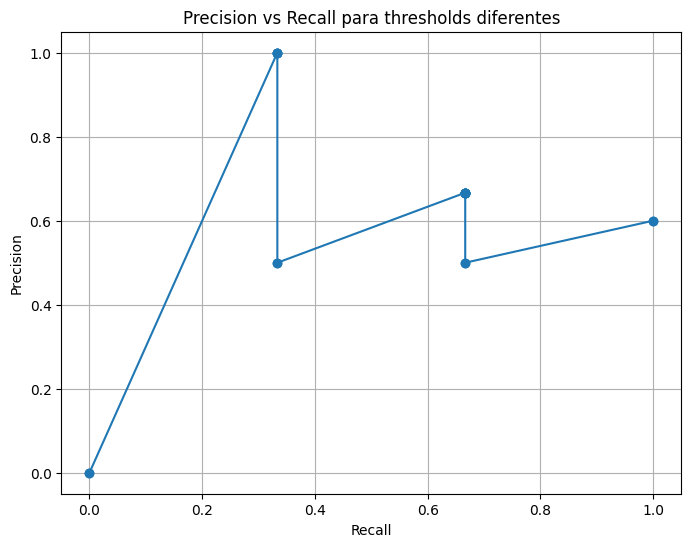

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score
import numpy as np

# Simulação de predições e ground truths
# Substitua esses arrays com os valores reais do seu modelo
predictions = np.array([0.9, 0.7, 0.2, 0.6, 0.1])  # Confianças
pred_classes = np.array([1, 1, 0, 1, 0])           # Classes preditas
true_classes = np.array([1, 0, 0, 1, 1])           # Ground truths

thresholds = np.linspace(0, 1, 20)
precisions = []
recalls = []

for threshold in thresholds:
    filtered_preds = (predictions >= threshold).astype(int)  # 1 se conf >= threshold, senão 0
    precision = precision_score(true_classes, filtered_preds, zero_division=0)
    recall = recall_score(true_classes, filtered_preds, zero_division=0)
    precisions.append(precision)
    recalls.append(recall)

# Gerar o gráfico Precision x Recall
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, marker='o')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall para thresholds diferentes')
plt.grid(True)
plt.show()


pega modelo ja pretreinado e treina em uma pasta com modelos que supostamente tem mais classes minoritarias: data-fc arquivo temporario indicando local q foi o dataset "balanceado", com uma tentativa de weighted manual

In [1]:
from ultralytics import YOLO
run_name = f"weighted_run"


model = YOLO("runs/detect/train_tuned_ultimo/weights/best.pt") 
model.to('cuda')  # GPU

print(f"Modelo carregado em: {next(model.model.parameters()).device}")  # Confirma se foi para a GPU

model.train(
    data="data_fc.yaml",
    epochs=90,
    imgsz=640,
    batch=8,
    device="0",       # ajuste se quiser usar CPU: "cpu"
    cache="disk",
    amp=True,
    optimizer="SGD",
    lr0=0.001,
    augment=True,
    save_period=10,
    patience=50,
    name=run_name
)


Modelo carregado em: cuda:0
New https://pypi.org/project/ultralytics/8.3.139 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.137  Python-3.10.0 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4060, 8187MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=disk, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data_fc.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=90, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=runs/detect/train_tuned_ultimo/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, na

train: Scanning G:\ambientetestetec\final_cross\fold_1\train\labels.cache... 8010 images, 1 backgrounds, 0 corrupt: 100%|██████████| 8010/8010 [00:00<?, ?it/s]
train: Caching images (6.9GB Disk): 100%|██████████| 8010/8010 [00:01<00:00, 5164.92it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access  (ping: 2.03.0 ms, read: 3.80.5 MB/s, size: 48.0 KB)


val: Scanning G:\ambientetestetec\valid\labels.cache... 966 images, 3 backgrounds, 0 corrupt: 100%|██████████| 966/966 [00:00<?, ?it/s]
val: Caching images (0.8GB Disk): 100%|██████████| 966/966 [00:00<00:00, 5675.83it/s]


Plotting labels to runs\detect\weighted_run9\labels.jpg... 
optimizer: SGD(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\weighted_run9
Starting training for 90 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/90      1.44G      1.563      1.598      1.381         23        640: 100%|██████████| 1002/1002 [01:40<00:00,  9.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.51it/s]


                   all        966      13450      0.511       0.56      0.401      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/90      1.46G      1.527      1.548      1.342          9        640: 100%|██████████| 1002/1002 [01:31<00:00, 10.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.71it/s]


                   all        966      13450      0.525      0.557       0.41      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/90      1.56G      1.519      1.537      1.318         45        640: 100%|██████████| 1002/1002 [01:29<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.69it/s]


                   all        966      13450      0.518      0.553      0.394      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/90      1.56G      1.487      1.511      1.291         36        640: 100%|██████████| 1002/1002 [01:31<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.76it/s]


                   all        966      13450      0.511      0.563      0.393      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/90      1.56G      1.469      1.489      1.273         27        640: 100%|██████████| 1002/1002 [01:32<00:00, 10.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.78it/s]


                   all        966      13450      0.526      0.573      0.389      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/90      1.56G      1.463      1.477      1.261         25        640: 100%|██████████| 1002/1002 [01:29<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.73it/s]


                   all        966      13450      0.517      0.563      0.385       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/90      1.57G      1.449       1.48      1.253         25        640: 100%|██████████| 1002/1002 [01:29<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.80it/s]


                   all        966      13450      0.513      0.562      0.379      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/90      1.57G      1.439       1.47      1.246         39        640: 100%|██████████| 1002/1002 [01:29<00:00, 11.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.82it/s]


                   all        966      13450      0.517      0.565      0.394      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/90      1.57G      1.421      1.442      1.234         21        640: 100%|██████████| 1002/1002 [01:28<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.81it/s]


                   all        966      13450      0.519      0.557      0.392      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/90      1.57G       1.43      1.476      1.232         65        640: 100%|██████████| 1002/1002 [01:29<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.70it/s]


                   all        966      13450      0.519      0.557      0.387       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/90      1.57G      1.426      1.459      1.233         14        640: 100%|██████████| 1002/1002 [01:29<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.83it/s]


                   all        966      13450      0.519      0.559      0.392      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/90      1.66G      1.416      1.456      1.224         48        640: 100%|██████████| 1002/1002 [01:28<00:00, 11.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.82it/s]


                   all        966      13450      0.518      0.559      0.389      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/90      1.66G      1.404      1.438      1.219         22        640: 100%|██████████| 1002/1002 [01:28<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.78it/s]


                   all        966      13450      0.501       0.57      0.389      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/90      1.66G      1.408      1.446      1.219         64        640: 100%|██████████| 1002/1002 [01:29<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.80it/s]


                   all        966      13450      0.512      0.572      0.388      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/90      1.76G      1.396      1.427       1.21         53        640: 100%|██████████| 1002/1002 [01:29<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.84it/s]


                   all        966      13450        0.5      0.573      0.382      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/90      1.76G      1.384       1.41      1.201         58        640: 100%|██████████| 1002/1002 [01:29<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.79it/s]


                   all        966      13450       0.51      0.579       0.38      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/90      1.76G      1.386      1.426      1.204         49        640: 100%|██████████| 1002/1002 [01:28<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.77it/s]


                   all        966      13450      0.511      0.568      0.387       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/90      1.76G      1.394      1.423      1.203         37        640: 100%|██████████| 1002/1002 [01:31<00:00, 10.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.82it/s]


                   all        966      13450      0.519      0.575      0.386      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/90      1.77G      1.369      1.382      1.188         24        640: 100%|██████████| 1002/1002 [01:28<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.82it/s]


                   all        966      13450      0.502      0.591       0.38      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/90      1.77G       1.37      1.393      1.193         14        640: 100%|██████████| 1002/1002 [01:29<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.82it/s]


                   all        966      13450      0.515       0.57      0.381      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/90      1.87G      1.359      1.375      1.185         32        640: 100%|██████████| 1002/1002 [01:31<00:00, 10.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.84it/s]


                   all        966      13450      0.518      0.582      0.384      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/90      1.87G       1.37      1.396      1.187         36        640: 100%|██████████| 1002/1002 [01:29<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.69it/s]


                   all        966      13450      0.527      0.549      0.378      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/90      1.87G      1.359      1.378      1.186         48        640: 100%|██████████| 1002/1002 [01:29<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.82it/s]


                   all        966      13450      0.522      0.582      0.393      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/90      1.87G      1.347      1.363       1.18         34        640: 100%|██████████| 1002/1002 [01:29<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.83it/s]


                   all        966      13450      0.521      0.554      0.387      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/90      1.87G      1.343      1.364      1.173         42        640: 100%|██████████| 1002/1002 [01:29<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.80it/s]


                   all        966      13450      0.518      0.566       0.39      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/90      1.87G      1.349      1.371      1.175         47        640: 100%|██████████| 1002/1002 [01:29<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.75it/s]


                   all        966      13450      0.533      0.566      0.386      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/90      1.87G      1.333      1.347      1.172         38        640: 100%|██████████| 1002/1002 [01:31<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.86it/s]


                   all        966      13450      0.528      0.566      0.387      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/90      1.87G      1.335      1.358       1.17         28        640: 100%|██████████| 1002/1002 [01:32<00:00, 10.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.77it/s]


                   all        966      13450      0.519      0.583      0.383      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/90      1.87G      1.343       1.37      1.173         65        640: 100%|██████████| 1002/1002 [01:29<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.77it/s]


                   all        966      13450       0.52      0.571      0.377       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/90      1.87G      1.335      1.351      1.169         49        640: 100%|██████████| 1002/1002 [01:29<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.78it/s]


                   all        966      13450      0.521       0.58      0.392      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/90      1.87G      1.316      1.329       1.16         32        640: 100%|██████████| 1002/1002 [01:29<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.85it/s]


                   all        966      13450      0.519      0.567      0.383      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/90      1.87G      1.324      1.345      1.164         26        640: 100%|██████████| 1002/1002 [01:29<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.82it/s]


                   all        966      13450      0.524      0.584      0.387      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/90      1.87G       1.33      1.346      1.163         40        640: 100%|██████████| 1002/1002 [01:29<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.85it/s]


                   all        966      13450       0.52      0.553      0.374      0.257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/90      1.87G      1.318      1.341      1.159         13        640: 100%|██████████| 1002/1002 [01:29<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.84it/s]


                   all        966      13450      0.511      0.573      0.381      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/90      1.87G      1.316      1.329       1.16         63        640: 100%|██████████| 1002/1002 [01:28<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.82it/s]


                   all        966      13450      0.515      0.576      0.384      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/90      1.87G       1.32      1.338      1.161         17        640: 100%|██████████| 1002/1002 [01:37<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.84it/s]


                   all        966      13450      0.519      0.585      0.388      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/90      1.87G      1.319      1.332      1.156         30        640: 100%|██████████| 1002/1002 [01:45<00:00,  9.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.88it/s]


                   all        966      13450      0.521      0.565      0.384      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/90      1.87G      1.301      1.317      1.151         20        640: 100%|██████████| 1002/1002 [01:28<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.84it/s]


                   all        966      13450      0.522      0.572      0.383      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/90      1.87G       1.31       1.33      1.155         43        640: 100%|██████████| 1002/1002 [01:29<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.79it/s]


                   all        966      13450      0.519      0.581      0.379      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/90      1.87G      1.302      1.305      1.149         83        640: 100%|██████████| 1002/1002 [01:29<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.81it/s]


                   all        966      13450      0.527      0.573      0.382      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/90      1.87G       1.31      1.329      1.154         24        640: 100%|██████████| 1002/1002 [01:29<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.85it/s]


                   all        966      13450      0.523      0.572      0.386      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/90      1.87G       1.31      1.333      1.152         29        640: 100%|██████████| 1002/1002 [01:29<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.86it/s]


                   all        966      13450       0.51      0.582      0.381      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/90      1.87G      1.289      1.301      1.142         29        640: 100%|██████████| 1002/1002 [01:29<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.84it/s]


                   all        966      13450      0.522      0.584       0.38      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/90      1.87G      1.295      1.304      1.142         26        640: 100%|██████████| 1002/1002 [01:29<00:00, 11.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.84it/s]


                   all        966      13450      0.521       0.58      0.387      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/90      1.87G      1.295      1.314      1.149         20        640: 100%|██████████| 1002/1002 [01:30<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.85it/s]


                   all        966      13450      0.521      0.578      0.385      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/90      1.87G      1.303      1.325       1.15         60        640: 100%|██████████| 1002/1002 [01:29<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.84it/s]


                   all        966      13450      0.515      0.575      0.391       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/90      1.87G       1.29      1.296      1.145         48        640: 100%|██████████| 1002/1002 [01:29<00:00, 11.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.87it/s]


                   all        966      13450      0.517      0.577      0.391       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/90      1.87G       1.29      1.299      1.139         38        640: 100%|██████████| 1002/1002 [01:29<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.87it/s]


                   all        966      13450      0.519       0.58      0.384      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/90      1.87G      1.278       1.29      1.136         66        640: 100%|██████████| 1002/1002 [01:29<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.87it/s]


                   all        966      13450      0.525      0.578      0.398      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/90      1.87G      1.281      1.289      1.139         51        640: 100%|██████████| 1002/1002 [01:29<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.72it/s]


                   all        966      13450       0.53      0.559      0.397      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/90      1.87G      1.282      1.288      1.137         39        640: 100%|██████████| 1002/1002 [01:29<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.82it/s]


                   all        966      13450      0.527      0.568       0.38      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/90      1.87G      1.281      1.288      1.136         51        640: 100%|██████████| 1002/1002 [01:28<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.82it/s]


                   all        966      13450      0.521      0.579      0.381      0.265
EarlyStopping: Training stopped early as no improvement observed in last 50 epochs. Best results observed at epoch 2, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

52 epochs completed in 1.430 hours.
Optimizer stripped from runs\detect\weighted_run9\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\weighted_run9\weights\best.pt, 6.2MB

Validating runs\detect\weighted_run9\weights\best.pt...
Ultralytics 8.3.137  Python-3.10.0 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4060, 8187MiB)
Model summary (fused): 72 layers, 3,007,988 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:14<00:00,  4.08it/s]


                   all        966      13450      0.524      0.563      0.402      0.285
               big bus        210        273      0.844      0.397       0.56      0.433
             big truck        404       1162      0.833       0.41      0.562      0.376
                bus-l-          8          8     0.0397      0.625     0.0411     0.0206
                bus-s-         12         12      0.229      0.833      0.283      0.249
                   car        927       8537      0.891      0.678      0.773       0.47
             mid truck        118        257      0.842      0.428      0.451      0.339
             small bus         43         49      0.253      0.286      0.121     0.0712
           small truck        517       1721      0.767      0.477      0.559      0.367
              truck-l-        266        433      0.462      0.691      0.429       0.32
              truck-m-        331        629       0.41      0.653      0.331      0.249
              truck-s

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002163E3F0DF0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.04504

In [10]:
from ultralytics import YOLO
run_name = f"weighted_run"
import torch

model = YOLO("runs/detect/weighted_run9/weights/best.pt") 
model.to('cuda')  # GPU

print(f"Modelo carregado em: {next(model.model.parameters()).device}")  # Confirma se foi para a GPU
class_weights = torch.tensor([1.0, 5.0, 10.0]).to('cuda')  # pesos maiores para classes minoritárias

model.train(
    data="dataz.yaml",
    epochs=90,
    imgsz=640,
    batch=8,
    device="0",
    cache="disk",
    amp=True,
    optimizer="SGD",
    lr0=0.001,
    augment=True,
    save_period=10,
    patience=50,
    name=run_name,
)

Modelo carregado em: cuda:0
New https://pypi.org/project/ultralytics/8.3.139 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.137  Python-3.10.0 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4060, 8187MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=disk, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataz.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=90, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=runs/detect/weighted_run9/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=weig

train: Scanning G:\ambientetestetec\train_augmented_4x_v2\labels... 7902 images, 3 backgrounds, 0 corrupt: 100%|██████████| 7902/7902 [00:16<00:00, 475.28it/s]

train: G:\ambientetestetec\train_augmented_4x_v2\images\adit_mp4-1357_jpg.rf.2f4228b88eed2a385c26be2238d05d8e.jpg: 2 duplicate labels removed
train: G:\ambientetestetec\train_augmented_4x_v2\images\adit_mp4-1357_jpg.rf.2f4228b88eed2a385c26be2238d05d8e_aug_0_24868.jpg: 2 duplicate labels removed
train: G:\ambientetestetec\train_augmented_4x_v2\images\adit_mp4-1357_jpg.rf.2f4228b88eed2a385c26be2238d05d8e_aug_1_63555.jpg: 2 duplicate labels removed


train: New cache created: G:\ambientetestetec\train_augmented_4x_v2\labels.cache


train: Caching images (6.8GB Disk): 100%|██████████| 7902/7902 [00:50<00:00, 155.76it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access  (ping: 5.02.8 ms, read: 2.51.4 MB/s, size: 50.6 KB)


val: Scanning G:\ambientetestetec\valid\labels.cache... 966 images, 3 backgrounds, 0 corrupt: 100%|██████████| 966/966 [00:00<?, ?it/s]
val: Caching images (0.8GB Disk): 100%|██████████| 966/966 [00:00<00:00, 1181.34it/s]


Plotting labels to runs\detect\weighted_run12\labels.jpg... 
optimizer: SGD(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\weighted_run12
Starting training for 90 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/90       1.6G       1.05     0.5816      1.045        135        640: 100%|██████████| 988/988 [02:00<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.70it/s]


                   all        966      13450      0.515      0.584      0.435      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/90      1.61G      1.042     0.5553       1.04        102        640: 100%|██████████| 988/988 [01:40<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.10it/s]

                   all        966      13450      0.514      0.579      0.439       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/90      1.73G      1.036     0.5505      1.035        146        640: 100%|██████████| 988/988 [01:39<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.06it/s]

                   all        966      13450      0.512       0.58      0.436      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/90      1.74G      1.034     0.5516      1.036        130        640: 100%|██████████| 988/988 [01:37<00:00, 10.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.12it/s]

                   all        966      13450      0.507       0.59      0.455      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/90      1.76G      1.028     0.5478      1.034        144        640: 100%|██████████| 988/988 [01:37<00:00, 10.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.10it/s]

                   all        966      13450      0.514      0.569      0.435      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/90      1.77G      1.029     0.5419      1.031        162        640: 100%|██████████| 988/988 [01:38<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.08it/s]

                   all        966      13450      0.516      0.585      0.441      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/90      1.77G      1.021      0.543       1.03        183        640: 100%|██████████| 988/988 [01:37<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.10it/s]

                   all        966      13450      0.511      0.591      0.436      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/90      1.77G      1.025     0.5431      1.032         71        640: 100%|██████████| 988/988 [01:38<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.10it/s]

                   all        966      13450      0.514      0.582      0.442      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/90      1.77G      1.015     0.5364      1.029        127        640: 100%|██████████| 988/988 [01:38<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.08it/s]

                   all        966      13450      0.507      0.596      0.441      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/90      1.77G      1.019     0.5364      1.026        178        640: 100%|██████████| 988/988 [01:38<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.09it/s]

                   all        966      13450      0.511      0.597      0.437      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/90      1.77G      1.016     0.5362      1.027        156        640: 100%|██████████| 988/988 [01:38<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.12it/s]


                   all        966      13450      0.515      0.589      0.439      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/90      1.78G       1.02     0.5378      1.029         61        640: 100%|██████████| 988/988 [01:37<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.08it/s]

                   all        966      13450      0.516      0.596      0.435      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/90      1.78G      1.013     0.5334      1.026         95        640: 100%|██████████| 988/988 [01:37<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.09it/s]

                   all        966      13450      0.522      0.595      0.437      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/90      1.78G      1.016     0.5353      1.027        123        640: 100%|██████████| 988/988 [01:38<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.14it/s]

                   all        966      13450      0.515      0.592      0.429      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/90      1.78G      1.007     0.5323      1.023         75        640: 100%|██████████| 988/988 [01:37<00:00, 10.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.11it/s]

                   all        966      13450      0.523      0.591      0.435      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/90      1.78G      1.003     0.5279      1.021         95        640: 100%|██████████| 988/988 [01:37<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.09it/s]

                   all        966      13450      0.509      0.599       0.44      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/90      1.78G      1.005      0.528      1.023         78        640: 100%|██████████| 988/988 [01:37<00:00, 10.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.08it/s]


                   all        966      13450      0.511      0.595      0.435      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/90      1.78G      1.009     0.5302      1.024        140        640: 100%|██████████| 988/988 [01:38<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.10it/s]

                   all        966      13450      0.527      0.587      0.434      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/90      1.78G      1.008     0.5321      1.024         84        640: 100%|██████████| 988/988 [01:38<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.03it/s]

                   all        966      13450      0.521      0.596      0.437      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/90      1.78G      1.003     0.5245       1.02        136        640: 100%|██████████| 988/988 [01:37<00:00, 10.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.11it/s]

                   all        966      13450      0.516      0.597      0.438      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/90      1.78G      1.002     0.5252      1.022        113        640: 100%|██████████| 988/988 [01:38<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.08it/s]

                   all        966      13450      0.526      0.579      0.437      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/90      1.78G      1.001     0.5239      1.021        106        640: 100%|██████████| 988/988 [01:38<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.12it/s]

                   all        966      13450      0.523      0.589      0.436      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/90      1.78G      1.006     0.5275      1.024        152        640: 100%|██████████| 988/988 [01:37<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.11it/s]

                   all        966      13450      0.514      0.598      0.436      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/90      1.78G          1     0.5252      1.021        168        640: 100%|██████████| 988/988 [01:38<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.10it/s]

                   all        966      13450      0.525      0.594      0.434      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/90      1.78G      1.006     0.5261       1.02        149        640: 100%|██████████| 988/988 [01:37<00:00, 10.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.10it/s]

                   all        966      13450      0.526      0.592      0.433      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/90      1.78G          1     0.5221      1.017        140        640: 100%|██████████| 988/988 [01:37<00:00, 10.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.08it/s]

                   all        966      13450      0.522       0.59      0.433      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/90      1.78G      1.005     0.5263      1.021        156        640: 100%|██████████| 988/988 [01:38<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.08it/s]

                   all        966      13450      0.522      0.589      0.427       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/90      1.78G     0.9944     0.5219      1.019         61        640: 100%|██████████| 988/988 [01:38<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.08it/s]

                   all        966      13450      0.515      0.599      0.435      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/90      1.78G     0.9989     0.5215       1.02        181        640: 100%|██████████| 988/988 [01:38<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.08it/s]

                   all        966      13450      0.524      0.581      0.434      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/90      1.78G     0.9925     0.5192      1.017        140        640: 100%|██████████| 988/988 [01:38<00:00, 10.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.10it/s]

                   all        966      13450      0.515      0.594      0.426      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/90      1.78G     0.9924     0.5201      1.016         66        640: 100%|██████████| 988/988 [01:38<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.12it/s]

                   all        966      13450      0.521      0.593      0.431      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/90      1.78G     0.9968     0.5234      1.018        141        640: 100%|██████████| 988/988 [01:37<00:00, 10.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.10it/s]

                   all        966      13450      0.515      0.601      0.436      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/90      1.78G     0.9954     0.5209      1.017        106        640: 100%|██████████| 988/988 [01:37<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.10it/s]


                   all        966      13450      0.519      0.594      0.429      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/90      1.78G     0.9938     0.5197      1.016        134        640: 100%|██████████| 988/988 [01:37<00:00, 10.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.10it/s]

                   all        966      13450      0.521      0.596      0.438      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/90      1.78G     0.9888     0.5188      1.016         93        640: 100%|██████████| 988/988 [01:37<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.10it/s]

                   all        966      13450      0.518      0.596      0.432      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/90      1.78G      1.001     0.5238      1.022         98        640: 100%|██████████| 988/988 [01:37<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.13it/s]


                   all        966      13450      0.517      0.596      0.437      0.318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/90      1.78G     0.9904      0.516      1.012        131        640: 100%|██████████| 988/988 [01:38<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.12it/s]

                   all        966      13450      0.531      0.586      0.438      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/90      1.78G     0.9898     0.5174      1.013        131        640: 100%|██████████| 988/988 [01:38<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.09it/s]

                   all        966      13450      0.517        0.6      0.435      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/90      1.78G      0.989     0.5166      1.015        127        640: 100%|██████████| 988/988 [01:37<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.12it/s]

                   all        966      13450       0.52      0.594      0.433      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/90      1.78G     0.9929      0.517      1.018        131        640: 100%|██████████| 988/988 [01:37<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.12it/s]

                   all        966      13450      0.525      0.592       0.43      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/90      1.78G      0.991     0.5173      1.015        145        640: 100%|██████████| 988/988 [01:37<00:00, 10.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.11it/s]

                   all        966      13450      0.519      0.596      0.431      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/90      1.78G      0.983     0.5121      1.011        115        640: 100%|██████████| 988/988 [01:37<00:00, 10.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.06it/s]

                   all        966      13450      0.518      0.596      0.437      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/90      1.78G     0.9793     0.5109       1.01         72        640: 100%|██████████| 988/988 [01:38<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.14it/s]

                   all        966      13450      0.524      0.593      0.432      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/90      1.78G     0.9877     0.5144       1.01        178        640: 100%|██████████| 988/988 [01:38<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.12it/s]

                   all        966      13450      0.534      0.587      0.433      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/90      1.78G     0.9825     0.5121      1.012         86        640: 100%|██████████| 988/988 [01:37<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.11it/s]

                   all        966      13450      0.522       0.59      0.436      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/90      1.78G     0.9865     0.5133      1.013         96        640: 100%|██████████| 988/988 [01:38<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.10it/s]

                   all        966      13450      0.526       0.59      0.427      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/90      1.78G     0.9847     0.5123      1.014         93        640: 100%|██████████| 988/988 [01:38<00:00, 10.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.12it/s]

                   all        966      13450      0.526      0.592      0.428      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/90      1.78G     0.9821     0.5118      1.013        148        640: 100%|██████████| 988/988 [01:38<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.08it/s]

                   all        966      13450       0.52      0.596      0.431      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/90      1.78G     0.9776     0.5103      1.011        107        640: 100%|██████████| 988/988 [01:37<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.10it/s]

                   all        966      13450      0.523      0.595       0.43      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/90      1.78G     0.9824     0.5124      1.012        103        640: 100%|██████████| 988/988 [01:38<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.08it/s]


                   all        966      13450      0.526      0.591      0.433      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/90      1.78G     0.9805     0.5086      1.012         66        640: 100%|██████████| 988/988 [01:38<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.06it/s]

                   all        966      13450      0.522      0.594      0.432      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/90      1.78G     0.9793     0.5096       1.01         92        640: 100%|██████████| 988/988 [01:38<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.12it/s]

                   all        966      13450      0.521      0.596      0.432      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/90      1.78G     0.9802     0.5114       1.01        124        640: 100%|██████████| 988/988 [01:37<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.12it/s]


                   all        966      13450      0.523      0.593      0.432      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/90      1.78G     0.9805     0.5101       1.01        141        640: 100%|██████████| 988/988 [01:38<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.03it/s]

                   all        966      13450      0.524      0.593      0.433      0.315
EarlyStopping: Training stopped early as no improvement observed in last 50 epochs. Best results observed at epoch 4, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



54 epochs completed in 1.604 hours.
Optimizer stripped from runs\detect\weighted_run12\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\weighted_run12\weights\best.pt, 6.2MB

Validating runs\detect\weighted_run12\weights\best.pt...
Ultralytics 8.3.137  Python-3.10.0 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4060, 8187MiB)
Model summary (fused): 72 layers, 3,007,988 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:15<00:00,  4.04it/s]


                   all        966      13450      0.506      0.578      0.443      0.321
               big bus        210        273      0.841      0.406      0.745      0.563
             big truck        404       1162      0.846      0.436      0.639      0.423
                bus-l-          8          8     0.0388      0.625     0.0489     0.0267
                bus-s-         12         12      0.219      0.833      0.363      0.326
                   car        927       8537       0.87      0.714      0.811      0.511
             mid truck        118        257      0.778      0.436      0.467      0.366
             small bus         43         49      0.254      0.312      0.109     0.0651
           small truck        517       1721      0.733      0.509      0.593      0.396
              truck-l-        266        433      0.441      0.684      0.446      0.344
              truck-m-        331        629      0.378       0.68      0.349      0.267
              truck-s

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000028A3039BEE0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.04504